In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [0]:
iris=datasets.load_iris()
X=pd.DataFrame({
    'sepal length' : iris.data[:,0],
    'sepal width' : iris.data[:,1],
    'petal length' : iris.data[:,2],
    'petal width' : iris.data[:,3] })
y=pd.Series(iris.target)


In [0]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4, random_state=0)

In [0]:
clf=RandomForestClassifier(n_estimators=10000,n_jobs=-1,random_state=0)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred=clf.predict(X_test)

In [7]:
accuracy_score(y_pred,y_test)*100

93.33333333333333

In [0]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

No handles with labels found to put in legend.


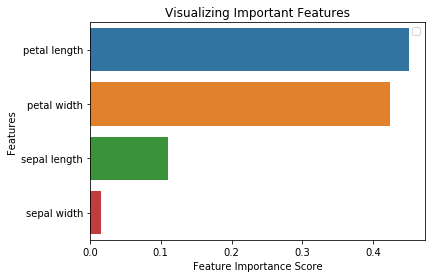

In [9]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [0]:
slf=SelectFromModel(clf,threshold=0.15)

In [11]:
slf.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,

In [12]:
for x in slf.get_support(indices=True):
    print(X.columns[x])

petal length
petal width


In [0]:
X_important_train=slf.transform(X_train)
X_important_test=slf.transform(X_test)

In [14]:
important_clf=RandomForestClassifier(n_estimators=10000, random_state=0)
important_clf.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pre=important_clf.predict(X_important_test)

In [16]:
print("Finally prediction with new important features: ",(accuracy_score(y_pre,y_test))*100)

Finally prediction with new important features:  90.0


Graph with only 2 important feature

In [0]:
slf_feature_imp = pd.Series(important_clf.feature_importances_,index=(X_important_train, X_important_test)).sort_values(ascending=False)

No handles with labels found to put in legend.


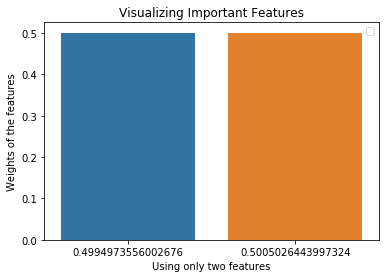

In [18]:
# Creating a bar plot
sns.barplot(x=slf_feature_imp, y=slf_feature_imp)
# Add labels to your graph
plt.xlabel('Using only two features')
plt.ylabel('Weights of the features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [20]:
ls

sample_data/
